In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.shape

(768, 9)

In [6]:
(diabetes == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
#Percentage of null values 
(diabetes == 0).sum()/768*100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [8]:
#Insulin and skin thickness have close to 50% and 30% of null values respectively. 
#This could mean that doctors do not always measure these two parameters.
#Therefore we need to make sure that there is no correlation between insulin/skin thickness and outcome.
#Otherwise our model might not be valid due to the high amount of missing data.

In [9]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


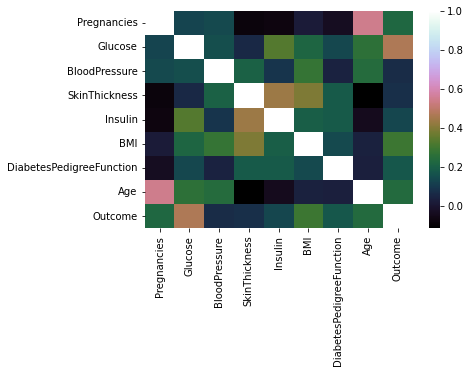

In [10]:
co = sns.heatmap(diabetes.corr(),cmap="cubehelix",annot=False)

In [11]:
#We find that insulin and skin thickness are not highly correlated to outcome.

In [12]:
diabetes["Insulin"].mean()

79.79947916666667

In [13]:
med = diabetes["Insulin"].median()
med

30.5

/Users/andreagarcia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

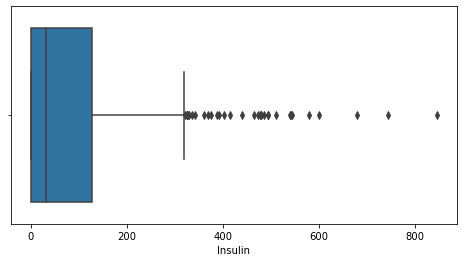

In [14]:
plt.rcParams['figure.figsize'] = 8,4
sns.boxplot(diabetes['Insulin'])

In [15]:
#Replacing null values with median due to outliars

In [16]:
diabetes['Insulin'].replace(to_replace = 0, value = diabetes['Insulin'].median(), inplace=True)

In [17]:

(diabetes == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
diabetes['SkinThickness'].replace(to_replace = 0, value = diabetes['SkinThickness'].median(), inplace=True)

/Users/andreagarcia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose'>

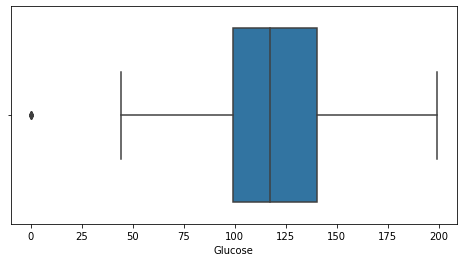

In [19]:
plt.rcParams['figure.figsize'] = 8,4
sns.boxplot(diabetes['Glucose'])

In [20]:
diabetes['Glucose'].replace(to_replace = 0, value = diabetes['Glucose'].median(), inplace=True)

/Users/andreagarcia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure'>

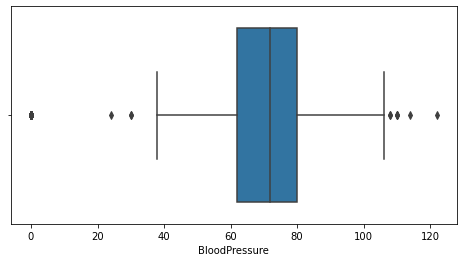

In [21]:
plt.rcParams['figure.figsize'] = 8,4
sns.boxplot(diabetes['BloodPressure'])

In [22]:
diabetes['BloodPressure'].replace(to_replace = 0, value = diabetes['BloodPressure'].median(), inplace=True)

In [23]:
diabetes['BMI'].replace(to_replace = 0, value = diabetes['BMI'].median(), inplace=True)

In [24]:
#All missing and null values are replaced

In [ ]:
#Exploratory analysis

In [25]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

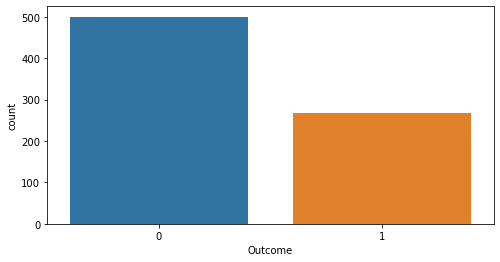

In [26]:
sns.countplot(x=diabetes['Outcome'],data=diabetes)

In [27]:
#There are 500 (65%) patients with no diabetes and 268 (35%) diagnosed with diabetes

In [28]:
# BMI ranges:
# - Underweight: less than 18.5
# - Normal weight: 18.5 to 24.9
# - Overweight: 25 to 29.9
# - Obese: 30 to 39.9
# - Morbid obesity: 40+#

In [29]:
diabetes.loc[(diabetes.BMI <= 18.4), 'bmicategory'] = 1
diabetes.loc[(diabetes.BMI > 18.4) & (diabetes.BMI < 25), 'bmicategory'] = 2
diabetes.loc[(diabetes.BMI >= 25) & (diabetes.BMI < 30), 'bmicategory'] = 3
diabetes.loc[(diabetes.BMI >= 30) & (diabetes.BMI < 40), 'bmicategory'] = 4
diabetes.loc[(diabetes.BMI >= 40), 'bmicategory'] = 5

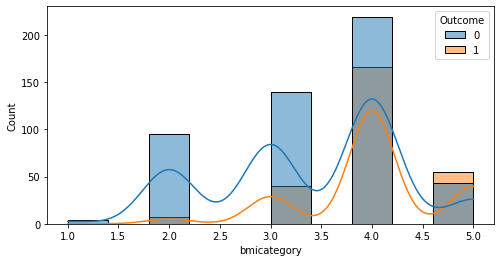

In [30]:
sns.histplot(data = diabetes,x="bmicategory",hue="Outcome",kde=True,bins=10)
plt.show()

In [31]:
#Risk of diabetes increases when BMI is within the obese range.

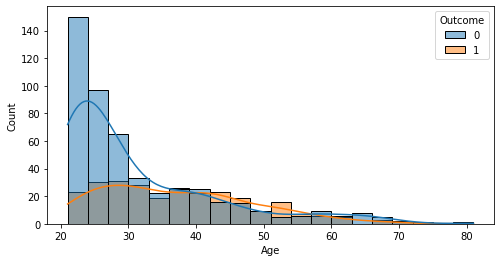

In [32]:
sns.histplot(data=diabetes,x="Age",hue="Outcome",bins=20,kde=True)
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

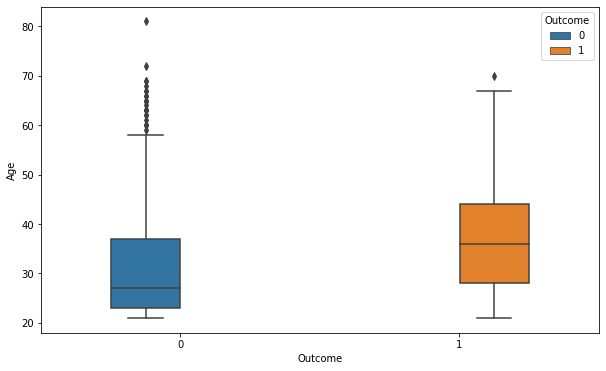

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(data = diabetes, x="Outcome", y="Age",hue = 'Outcome', width = 0.5)

In [ ]:
#The median of age for diabetec people is greater than of non-diabetic people.

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

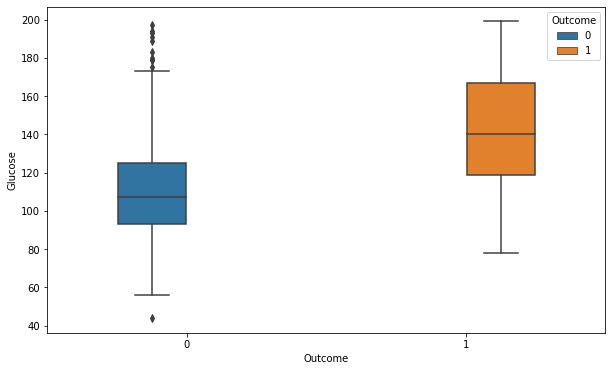

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data = diabetes, x="Outcome", y="Glucose",hue = 'Outcome', width = 0.5)

In [ ]:
#It can be obeserved that chances of having diabetes increase with higher glucose levels.

In [33]:
#Train/Test

In [34]:
X = diabetes.copy()
y = X.Outcome
X.drop(columns="Outcome",inplace=True)
X.shape,y.shape

((768, 9), (768,))

In [35]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 9), (231, 9), (537,), (231,))

In [36]:
#Extra Trees Classifier to find most indicative parameters of diabetes.

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
model = ExtraTreesClassifier()


In [39]:
model.fit(X_train, np.ravel(y_train))

ExtraTreesClassifier()

In [40]:
col = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

In [41]:
imp = pd.Series(model.feature_importances_, index = col)
imp

Pregnancies                 0.094036
Glucose                     0.248096
BloodPressure               0.084380
SkinThickness               0.072110
Insulin                     0.072047
BMI                         0.119508
DiabetesPedigreeFunction    0.093151
Age                         0.143560
Outcome                     0.073110
dtype: float64

<AxesSubplot:>

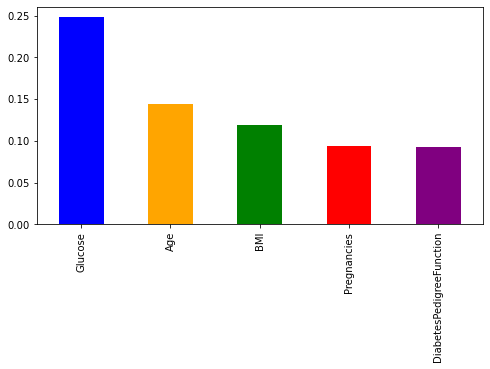

In [42]:
imp.nlargest(5).plot(kind = 'bar', color = ['blue', 'orange', 'green', 'red', 'purple'])

In [43]:
#We have found that Glucose, Age, BMI, Pregnancies, and Diabetes Pedigree Function hold the most importance.
#Since Pregnancies and Diabetes Pedigree Function hold very similar importance, we will only be using Glucose, Age, BMI, and Pregnancies for our model deployment.

In [ ]:
#Different classification methods are tested in order to find the highest accuracy.
#These are logistic regression, random forest, and Naive-Bayes classifier.

In [44]:
#Logistic Regression 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
lg=LogisticRegression(max_iter = 1000)
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [86]:
#Measuring test accuracy 
scoreLG = lg.score(X_test, y_test)
print("Test Accuracy Score is", scoreLG*100)

Test Accuracy Score is 74.89177489177489


In [48]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [49]:
CMatrix = confusion_matrix(y_test,y_pred)

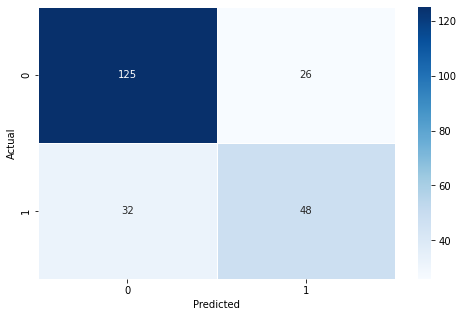

In [65]:

plt.figure(figsize=(8,5))
sns.heatmap(CMatrix,annot = True, linewidths=0.5,linecolor="white", fmt=".0f", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [85]:
#Measuring Test Accuracy
#As we can see, the random forest test is slighlty more accurate than logistic regression.
scoreRFC = rfc.score(X_test, y_test)
print("Test Accuracy Score is", scoreRFC*100)

Test Accuracy Score is 76.19047619047619


In [ ]:
#Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_Pred = nb.predict(X_test)

In [84]:
#Measuring Test Accuracy 
scoreNB = nb.score(X_test, y_test)
print("Test Accuracy Score is", scoreNB*100)

Test Accuracy Score is 74.02597402597402


In [60]:
 #Creating bar plot to compare accuracy between MLAs
df = pd.DataFrame({"Random Forest": [scoreRFC], "Logistic Regression": [scoreLG] , "Naive-Bayes": [scoreNB] })

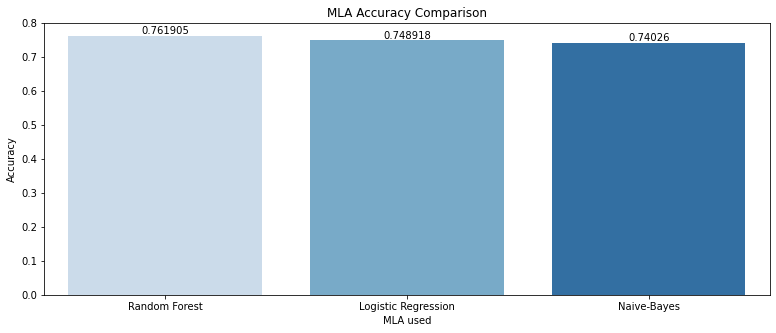

In [66]:
plt.subplots(figsize=(13,5))
ax = sns.barplot(data= df,palette='Blues')
plt.title('MLA Accuracy Comparison')
plt.xlabel("MLA used")
plt.ylabel("Accuracy")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [ ]:
#The MLAs used in this project yield similar accuracy results. However, the random forest test holds the highest accuracy(76%)